In [ ]:
1. 데이터 불러오기
2. 데이터 살펴보기(기술통계, 읽기, 구조, 크기)
3. missingno 결측값 시각화
    msno.matrix(df)
    df 전체 열에 대해 결측값을 시각화
4. train 데이터 상관분석(sale price)
    - sale price열이 어떤 속성과 강한 상관관계가 있을까?
5. pairplot, scatter 등 시각화
6. 범주형 변수
    각 변수에 따라 어떠한 범주 조사
7. 수치형 변수
    최대/최소

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
# 1. 데이터 불러오기
train=pd.read_csv("house_prices/train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# 2. 데이터 살펴보기(기술통계, 읽기, 구조, 크기)
# train.info()
# 1460 entries
# dtypes: float64(3), int64(35), object(43)
# 결측값이 존재한 컬럼들이 많다. Alley
train.shape  # (1460, 81)
train.size
train.describe() # 기술통계
train.columns
# 결측값 확인
train.isnull().sum() # LotFrontage : 259, 다른 컬럼들도 결측값 존재

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

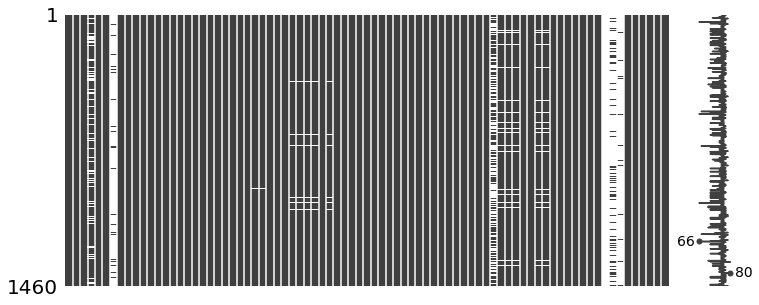

In [4]:
# 3. missingno 결측값 시각화
# NULL 확인
#모든 컬럼에 대한 결측치
msno.matrix(train, figsize=(12,5))

<AxesSubplot:>

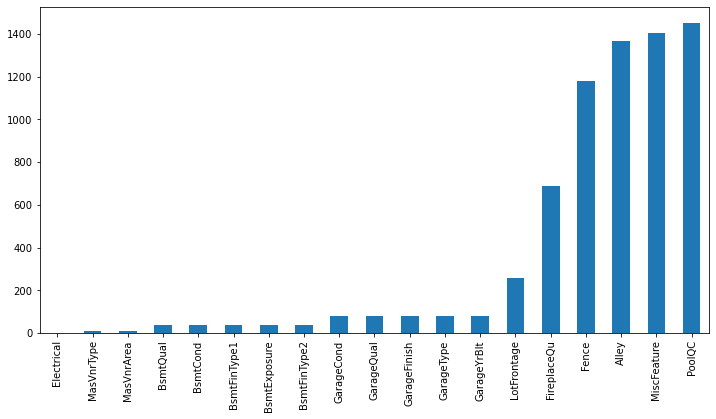

In [5]:
# 조금 더 직관적으로 결측값 보기 
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (12,6))
# PoolQC, MiscFeature, Alley, Fence, FireplaceQu 컬럼 순으로 결측값이 많다는 게 확인된다.

In [6]:
for col in train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msg)
# column: LotFrontage Percent of NaN value: 17.74%
# column:      Alley Percent of NaN value: 93.77%
# column: MasVnrType Percent of NaN value: 0.55%
# column: MasVnrType Percent of NaN value: 0.55%
# column: MasVnrArea Percent of NaN value: 0.55%
# column: Foundation Percent of NaN value: 0.00%
# column:   BsmtQual Percent of NaN value: 2.53%
# column:   BsmtCond Percent of NaN value: 2.53%
# column: BsmtExposure Percent of NaN value: 2.60%
# column: BsmtFinType1 Percent of NaN value: 2.53%
# column: BsmtFinType2 Percent of NaN value: 2.60%
# column: Electrical Percent of NaN value: 0.07%
# column: FireplaceQu Percent of NaN value: 47.26%
# column: GarageType Percent of NaN value: 5.55%
# column: GarageYrBlt Percent of NaN value: 5.55%
# column: GarageFinish Percent of NaN value: 5.55%
# column: GarageQual Percent of NaN value: 5.55%
# column: GarageCond Percent of NaN value: 5.55%
# column:     PoolQC Percent of NaN value: 99.52%
# column:      Fence Percent of NaN value: 80.75%
# column: MiscFeature Percent of NaN value: 96.30%        

column:         Id	 Percent of NaN value: 0.00%
column: MSSubClass	 Percent of NaN value: 0.00%
column:   MSZoning	 Percent of NaN value: 0.00%
column: LotFrontage	 Percent of NaN value: 17.74%
column:    LotArea	 Percent of NaN value: 0.00%
column:     Street	 Percent of NaN value: 0.00%
column:      Alley	 Percent of NaN value: 93.77%
column:   LotShape	 Percent of NaN value: 0.00%
column: LandContour	 Percent of NaN value: 0.00%
column:  Utilities	 Percent of NaN value: 0.00%
column:  LotConfig	 Percent of NaN value: 0.00%
column:  LandSlope	 Percent of NaN value: 0.00%
column: Neighborhood	 Percent of NaN value: 0.00%
column: Condition1	 Percent of NaN value: 0.00%
column: Condition2	 Percent of NaN value: 0.00%
column:   BldgType	 Percent of NaN value: 0.00%
column: HouseStyle	 Percent of NaN value: 0.00%
column: OverallQual	 Percent of NaN value: 0.00%
column: OverallCond	 Percent of NaN value: 0.00%
column:  YearBuilt	 Percent of NaN value: 0.00%
column: YearRemodAdd	 Percent of

In [30]:
# 4. train 데이터 상관분석(sale price)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


C:\Users\tjdbs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'SalePrice dstribution'}, xlabel='SalePrice', ylabel='Density'>

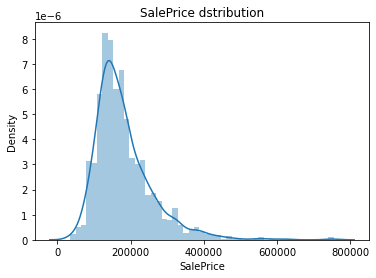

In [31]:
# 타겟 데이터(SalePrice) 분포 확인
plt.title('SalePrice dstribution')
sns.distplot(train['SalePrice'])
#정규분포가 아님,대칭 분포가 아니라 비대칭 분포이다

C:\Users\tjdbs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


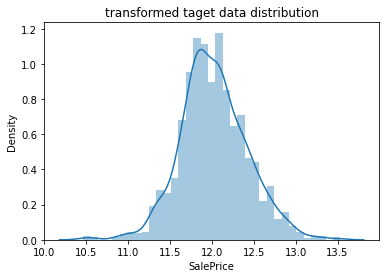

In [32]:
plt.title('transformed taget data distribution')
log_SalePrice = np.log1p(train['SalePrice'])
sns.distplot(log_SalePrice)

#타겟 데이터 정규분포화 하기
original_SalePrice = train['SalePrice']
train['SalePrice'] = np.log1p(train['SalePrice'])
# 위에서 타겟 데이터가 비대칭 분포를 가지고 있는 것을 확인하였다.
# 높은 성능의 회귀 모형을 만들기 위해서 정규분포화 해야만 한다.
# 하여 데이터에 로그를 취해서 정규분포화 하였다. 
# 넘파이 log1p를 이용하여 기존 SalePrice에 로그를 취한 후, 그 값을 train['SalePrice'] 값으로 대체한다.

In [34]:
# 결측값이 너무 많은 컬럼들은 제거하려고 했지만 여러 변수들의 특징을 잘 살펴보면 NaN의 의미가
# 단지 있다, 없다 개념일뿐 측정되지 않은 데이터의 의미가 아닌 것 같아 삭제하지 않았다.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

for col in cols_fillna:
    train[col].fillna('None',inplace=True)

In [35]:
# 위에서 설명한 바와 같이 결측데이터가 '없다'의 의미를 갖는 변수들
# NaN을 없다는 의미의 None 데이터로 바꿔준다.
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
# 결측치의 처리도 확인
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Id,0,0.000000
KitchenAbvGr,0,0.000000


In [37]:
# 위의 표에 남은 결측치들은 수치형 변수들이므로, 평균값으로 대체
train.fillna(train.mean(), inplace=True)

C:\Users\tjdbs\AppData\Local\Temp\ipykernel_16040\1059553085.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(), inplace=True)


In [39]:
# 결측값 다시 확인해보기
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Id,0,0.0
CentralAir,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


In [41]:
train.isnull().sum()  # 더 이상의 결측치가 남아있지 않음

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [51]:
# id 열은 필요가 없는 듯하여 제거
train.drop(['Id'],axis=1,inplace=True)

C:\Users\tjdbs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

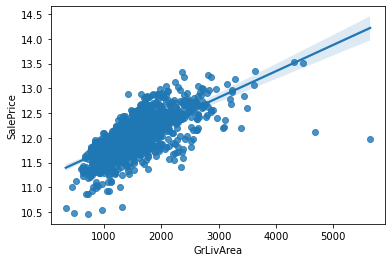

In [63]:
sns.regplot(train['GrLivArea'], train['SalePrice'])

In [72]:
# # corr()함수를 통해 dataframe내의 상관관계가 0.5이상인 컬럼만 heatmap으로 출력하였다.
# corrmat = train.corr()
# top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>=0.5]
# # heatmap
# plt.figure(figsize=(13,10))
# g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# # 시각화 결과를 보았을 때, SalePrice는 NbHd_num, ExtQ_num, BsQ_num, KiQ_num 컬럼들과 상관관계가 있다

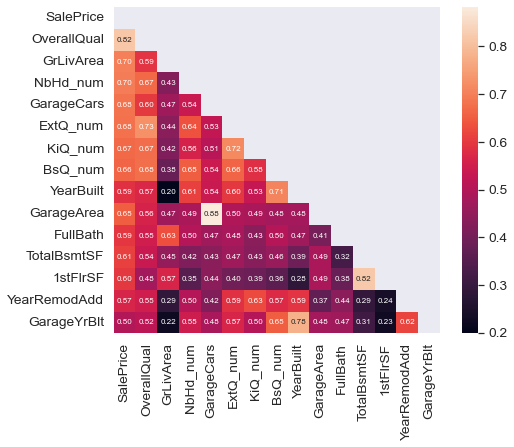

In [83]:
k = 15 #number of variables for heatmap
corrmat = abs(train.corr(method='spearman')) # correlation 전체 변수에 대해서 계산
cols = corrmat.nlargest(k, 'SalePrice').index # nlargest : Return this many descending sorted values
cm = np.corrcoef(train[cols].values.T) # correlation 특정 컬럼에 대해서
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(8, 6))

#Sokratis Kouvaras help to hide upper symmetric metrics
mask = np.zeros_like(cm) 
mask[np.triu_indices_from(mask)] = True 
sns.set_style("white")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values, mask = mask)
plt.show()


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'NbHd_num', 'GarageCars',
       'ExtQ_num', 'KiQ_num', 'BsQ_num', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF'],
      dtype='object')


<AxesSubplot:>

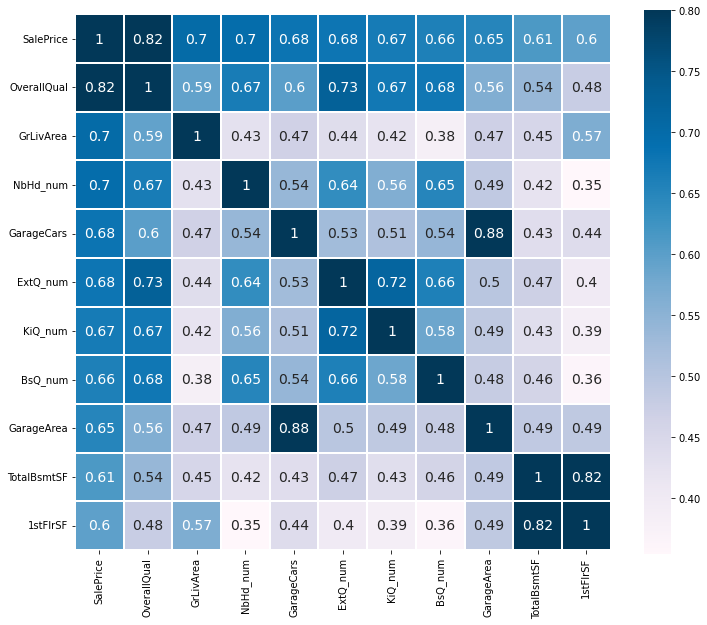

In [71]:
# 4. train 데이터 상관분석(sale price) - 수치형 변수들
k= 11
cols = train.corr().nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (12,10))
sns.heatmap(cm, vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':14},yticklabels = cols.values)
# Index(['SalePrice', 'OverallQual', 'GrLivArea', 'NbHd_num', 'GarageCars',
#        'ExtQ_num', 'KiQ_num', 'BsQ_num', 'GarageArea', 'TotalBsmtSF',
#        '1stFlrSF'],
#       dtype='object')
# SalePrice는 OverallQual, GrLivArea, NbHd_num 과 높은 상관관계를 보인다.

C:\Users\tjdbs\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


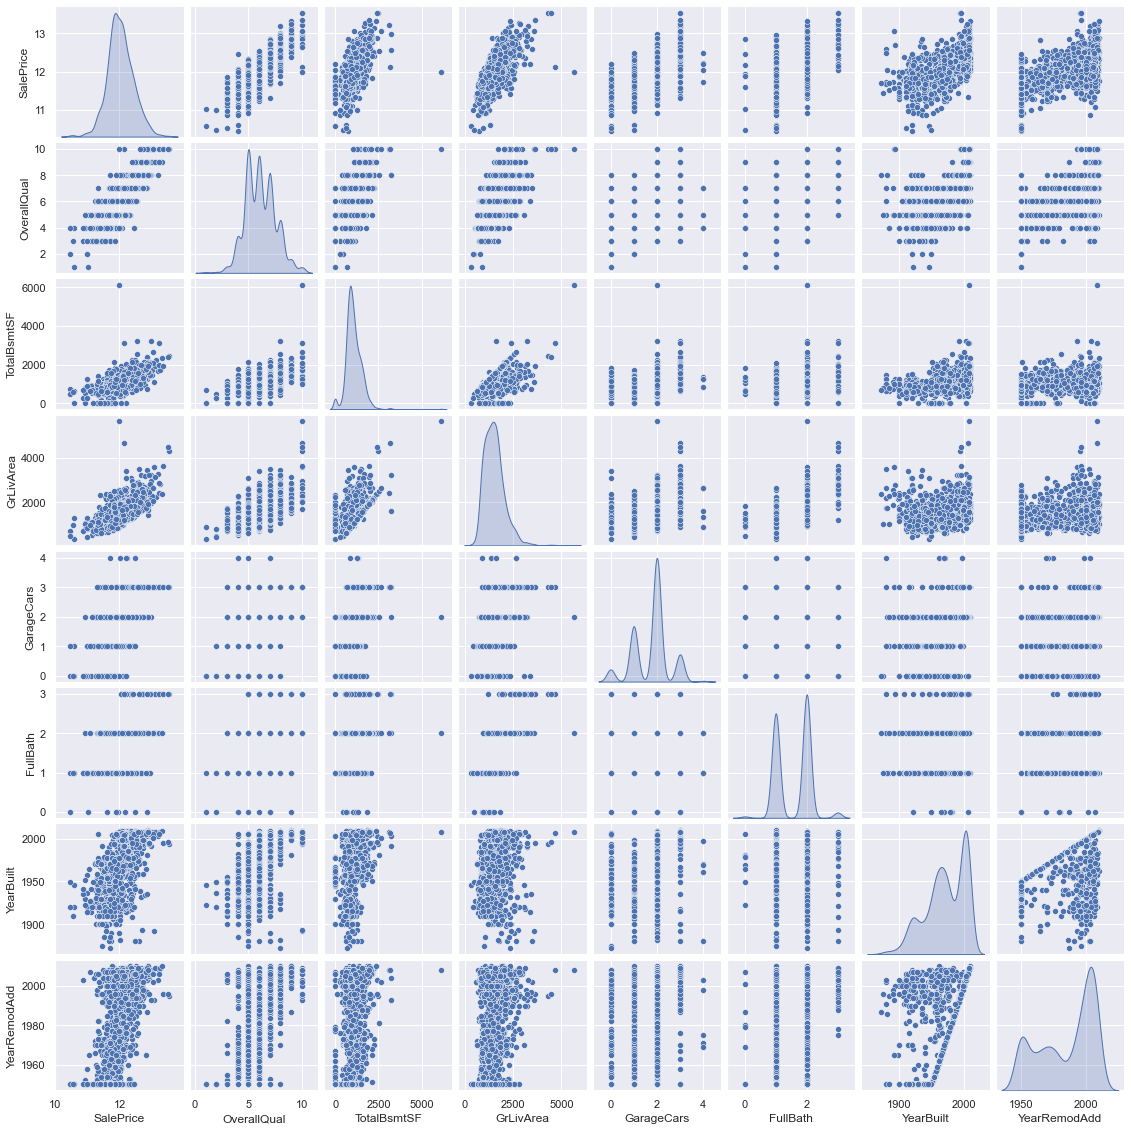

In [74]:
# 5. pairplot
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageCars','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

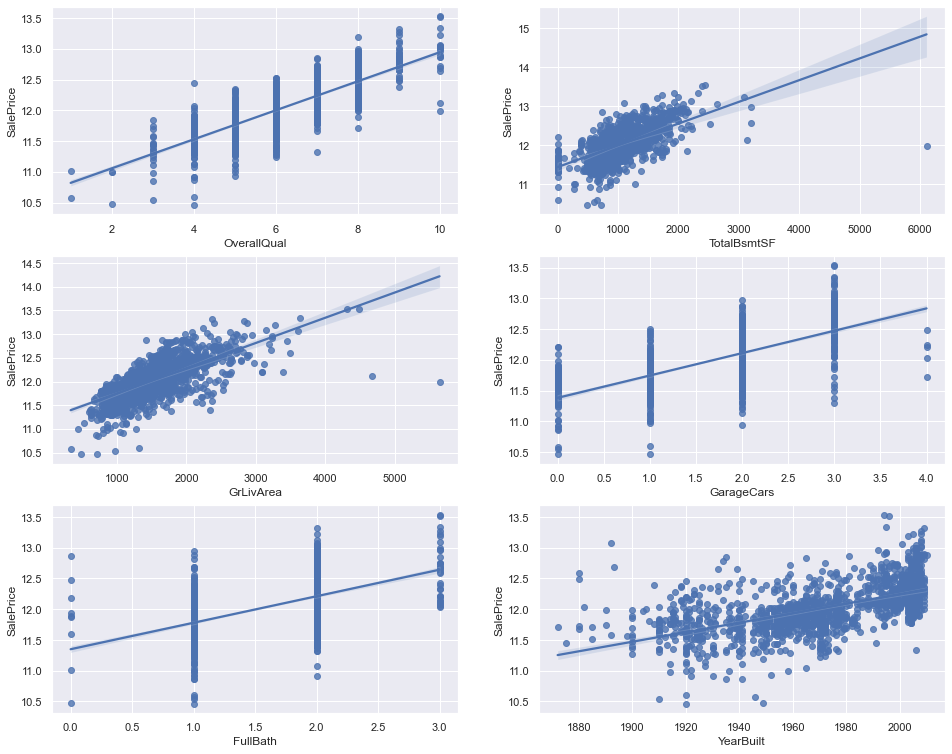

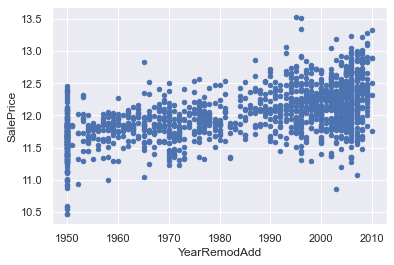

In [75]:
# scatter
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(16,13))
OverallQual_scatter_plot = pd.concat([train['SalePrice'],train['OverallQual']],axis = 1)
sns.regplot(x='OverallQual',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

TotalBsmtSF_scatter_plot = pd.concat([train['SalePrice'],train['TotalBsmtSF']],axis = 1)
sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

GrLivArea_scatter_plot = pd.concat([train['SalePrice'],train['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

GarageCars_scatter_plot = pd.concat([train['SalePrice'],train['GarageCars']],axis = 1)
sns.regplot(x='GarageCars',y = 'SalePrice',data = GarageCars_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

FullBath_scatter_plot = pd.concat([train['SalePrice'],train['FullBath']],axis = 1)
sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

YearBuilt_scatter_plot = pd.concat([train['SalePrice'],train['YearBuilt']],axis = 1)
sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6)
YearRemodAdd_scatter_plot = pd.concat([train['SalePrice'],train['YearRemodAdd']],axis = 1)
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice')

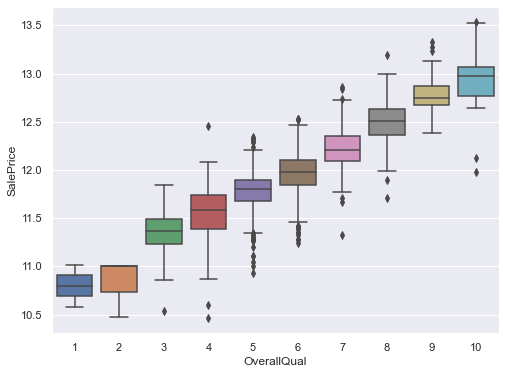

In [81]:
# SalePrice과 가장 높은 상관관계를 가지는 OverallQual과의 관계를 자세히 보기
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
#  OverallQual의 경우 집의 전반적인 가치를 의미하는 변수이다. 
# 수치가 높아지면 집의 가격이 높아지는것은 당연한 수순으로 상관관계 또한 0.79로 매우 높다. 
# 하지만 위의 Boxplot을 보면 점으로 표시된 부분은 그 정도가 너무 높거나 낮다. 확인이 필요한 부분이다.

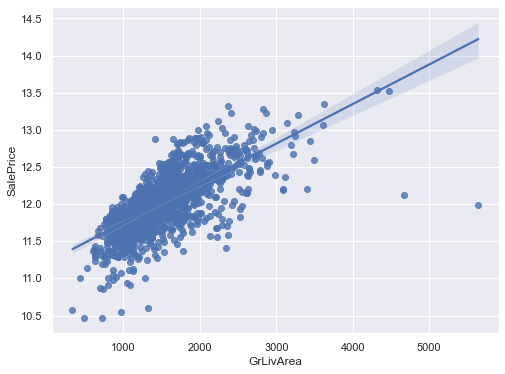

In [82]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='GrLivArea', y="SalePrice", data=data)
#  GrLivArea는 거실의 크기가 얼마나 되는지를 의미하는 변수 이다.
# 하지만 선과 동떨어진 두개의 점은 거실의 크기가 제일 큼에도 불구하고 가격은 낮은것을 봐서는 무슨 특별한 이유가 있을 것 같다. 

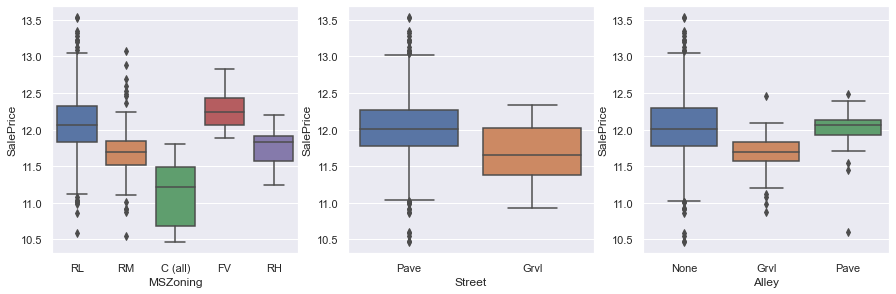

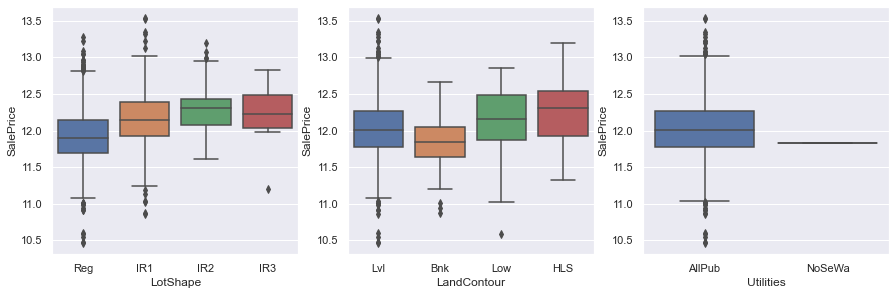

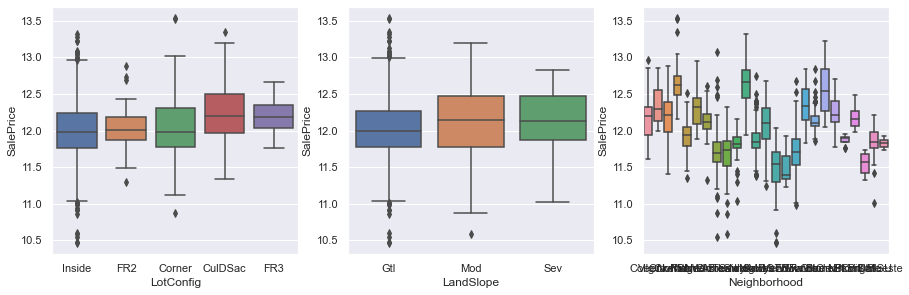

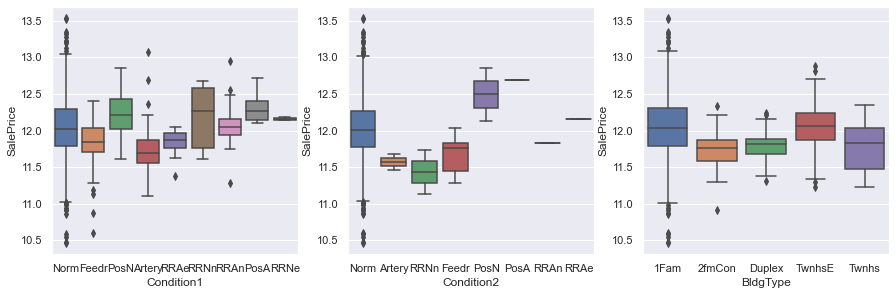

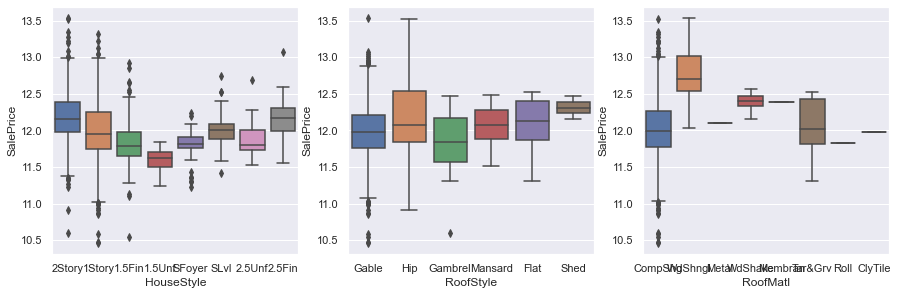

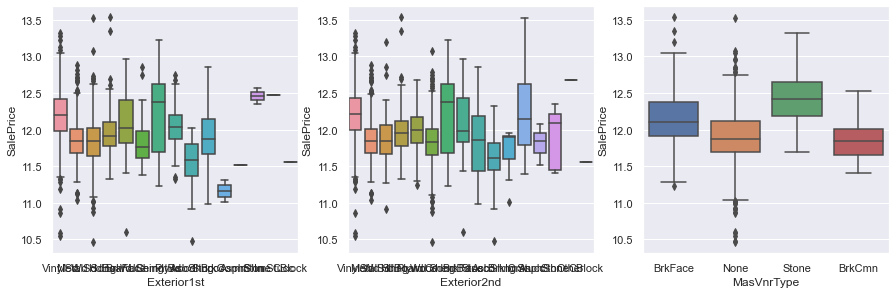

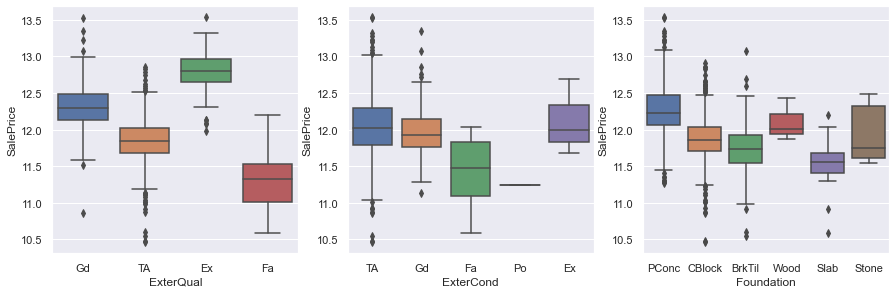

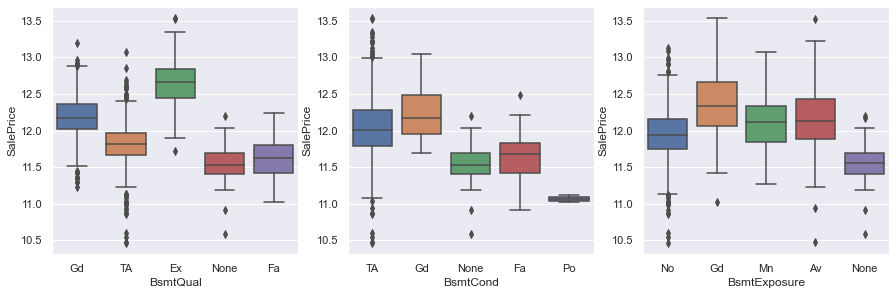

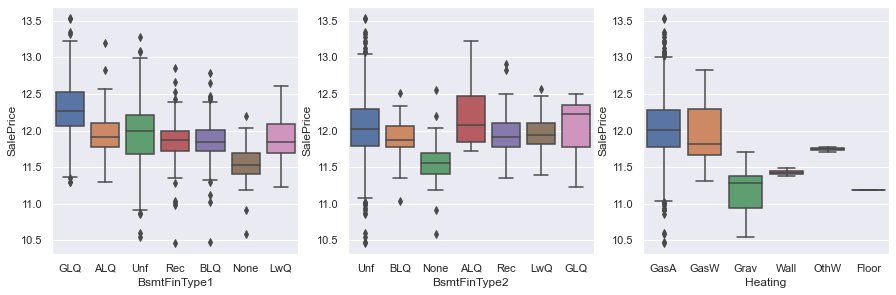

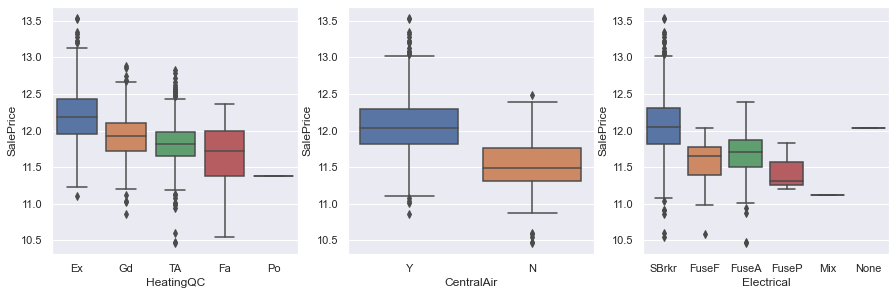

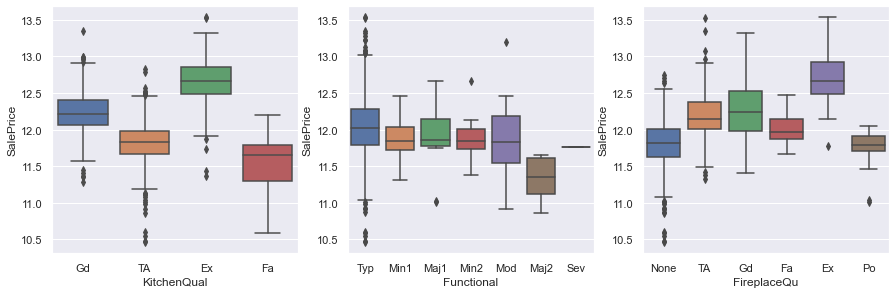

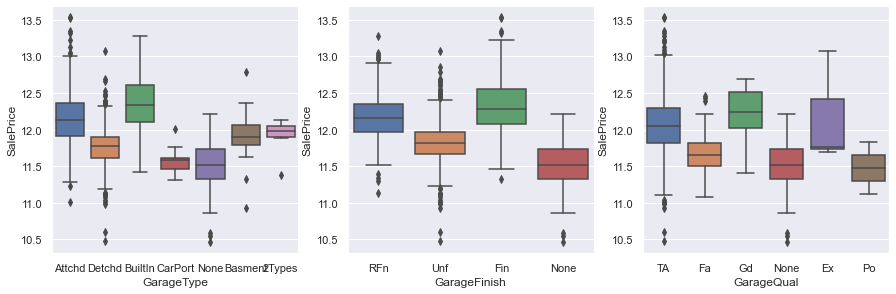

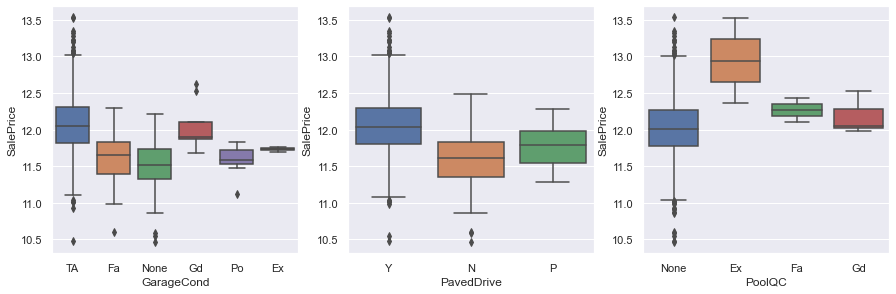

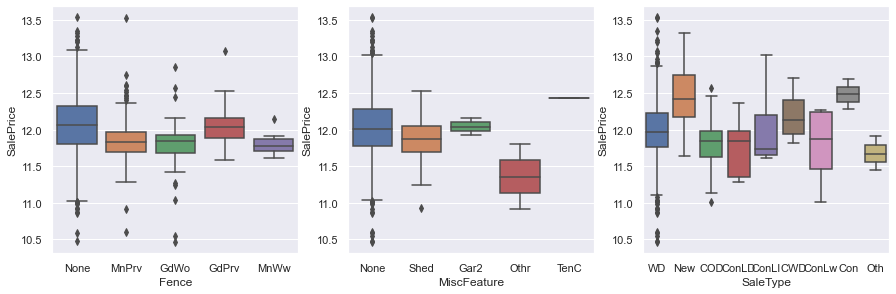

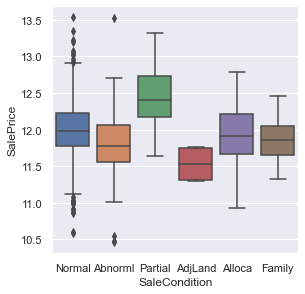

In [80]:
# 7. 범주형 변수
categorical_features = train.select_dtypes(include = ["object"]).columns

ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(train[categorical_features]):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=train, x=c, y='SalePrice', ax=ax2)
            #sns.violinplot(data=ds_cat, x=c, y='SalePrice', ax=ax2)
            #sns.swarmplot(data = ds_cat, x=c, y ='SalePrice', color = 'k', alpha = 0.4, ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1
# 수치형데이터가 아닌 범주형데이터의 시각화 모습